### Machine Learning Lesson 1-Hands on Helper

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn import metrics
import numpy as np

#### Let's try to predict what type of species we have based on the length and width of the petals of the Iris flowers.

In [15]:
iris = sns.load_dataset("iris")

In [16]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Data Wrangling

In [17]:
iris.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [18]:
def species_recode (series): 
    if series == "setosa":
        return 0
    if series == "versicolor": 
        return 1
    if series == "virginica": 
        return 2
    
iris['speciesR'] = iris['species'].apply(species_recode)

In [19]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
 5   speciesR      150 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [22]:
iris['sepal_length'] = iris['sepal_length'].astype(int)
iris['sepal_width'] = iris['sepal_width'].astype(int)
iris['petal_length'] = iris['petal_length'].astype(int)
iris['petal_width'] = iris['petal_width'].astype(int)

In [23]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sepal_length  150 non-null    int32 
 1   sepal_width   150 non-null    int32 
 2   petal_length  150 non-null    int32 
 3   petal_width   150 non-null    int32 
 4   species       150 non-null    object
 5   speciesR      150 non-null    int64 
dtypes: int32(4), int64(1), object(1)
memory usage: 4.8+ KB


In [24]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,speciesR
0,5,3,1,0,setosa,0
1,4,3,1,0,setosa,0
2,4,3,1,0,setosa,0
3,4,3,1,0,setosa,0
4,5,3,1,0,setosa,0


#### Define X and Y variables

In [25]:
x = iris[['sepal_length','sepal_width','petal_length','petal_width']]

In [26]:
y = iris['speciesR']

#### Train/Test Split Data

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .4, random_state=101)

In [28]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_train.shape)

(90, 4) (90,)
(60, 4) (90,)


#### Create the Model

In [29]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

#### Analyize the Predictions

In [30]:
predictions = lm.predict(x_test)
predictions

array([-0.07186399, -0.07650772, -0.07650772,  1.47713451,  1.07977848,
        1.23120504,  1.23120504,  1.38727534,  1.62856107,  0.07956257,
        1.90956351, -0.07186399, -0.07650772,  2.14620551,  1.23584878,
        1.23120504,  1.39191907,  1.38727534,  0.07956257,  1.62856107,
        0.98991931, -0.07650772,  1.38727534,  1.23584878,  1.23120504,
        0.98991931,  0.98991931,  2.06099007, -0.07650772,  0.07491884,
        1.90956351,  1.38727534,  1.63320481,  0.98991931,  1.90956351,
        1.38727534,  1.23584878,  1.39191907,  1.38727534,  2.15084924,
       -0.07650772,  0.07956257,  0.07956257,  1.63320481,  1.39191907,
        0.07956257,  1.75349321,  1.38727534,  0.07956257,  0.98991931,
        0.98991931, -0.07650772,  1.78463137, -0.07650772,  1.14598961,
        1.62856107,  1.38727534,  0.07956257, -0.07650772,  1.23584878])

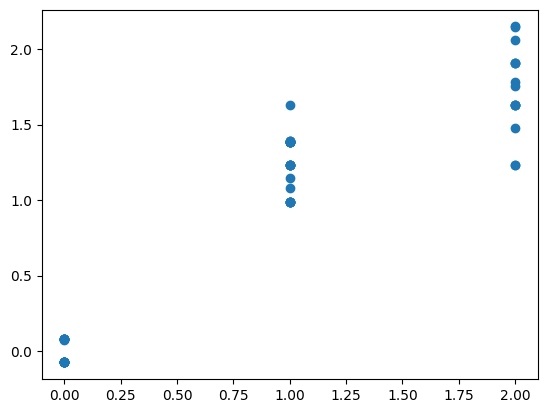

In [31]:
plt.scatter(y_test, predictions)

#### This model is 86% accurate based on the "Score" below

In [32]:
print("Score:", lm.score(x_test, y_test))

Score: 0.8604819952469147


#### Final check is to examine the error rates for the Model Fit

In [33]:
metrics.mean_absolute_error(y_test, predictions)

0.21144810223554514

In [34]:
metrics.mean_squared_error(y_test, predictions)

0.07844012267229021

In [35]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

0.28007163846467964